<a href="https://www.kaggle.com/code/ardaorcun/climate-time-series-analysis?scriptVersionId=131210603" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv
/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv


In [2]:
df=pd.read_csv("/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv")
df.head(2)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.0,84.5,0.00,1015.666667
1,2013-01-02,7.4,92.0,2.98,1017.800000


In [3]:
print(f"Number of missing values in ourt temperature column :{df.meantemp.isnull().sum()}")

Number of missing values in ourt temperature column :0


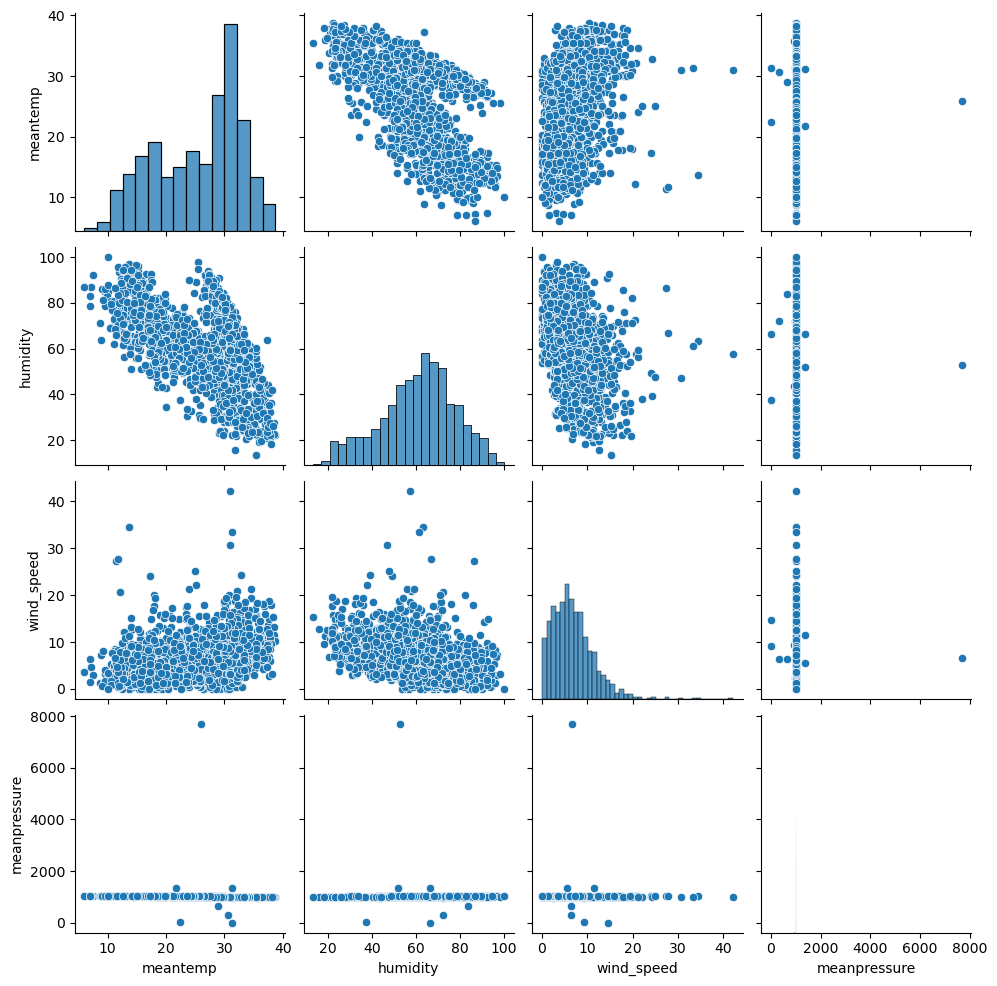

In [4]:
sns.pairplot(df)

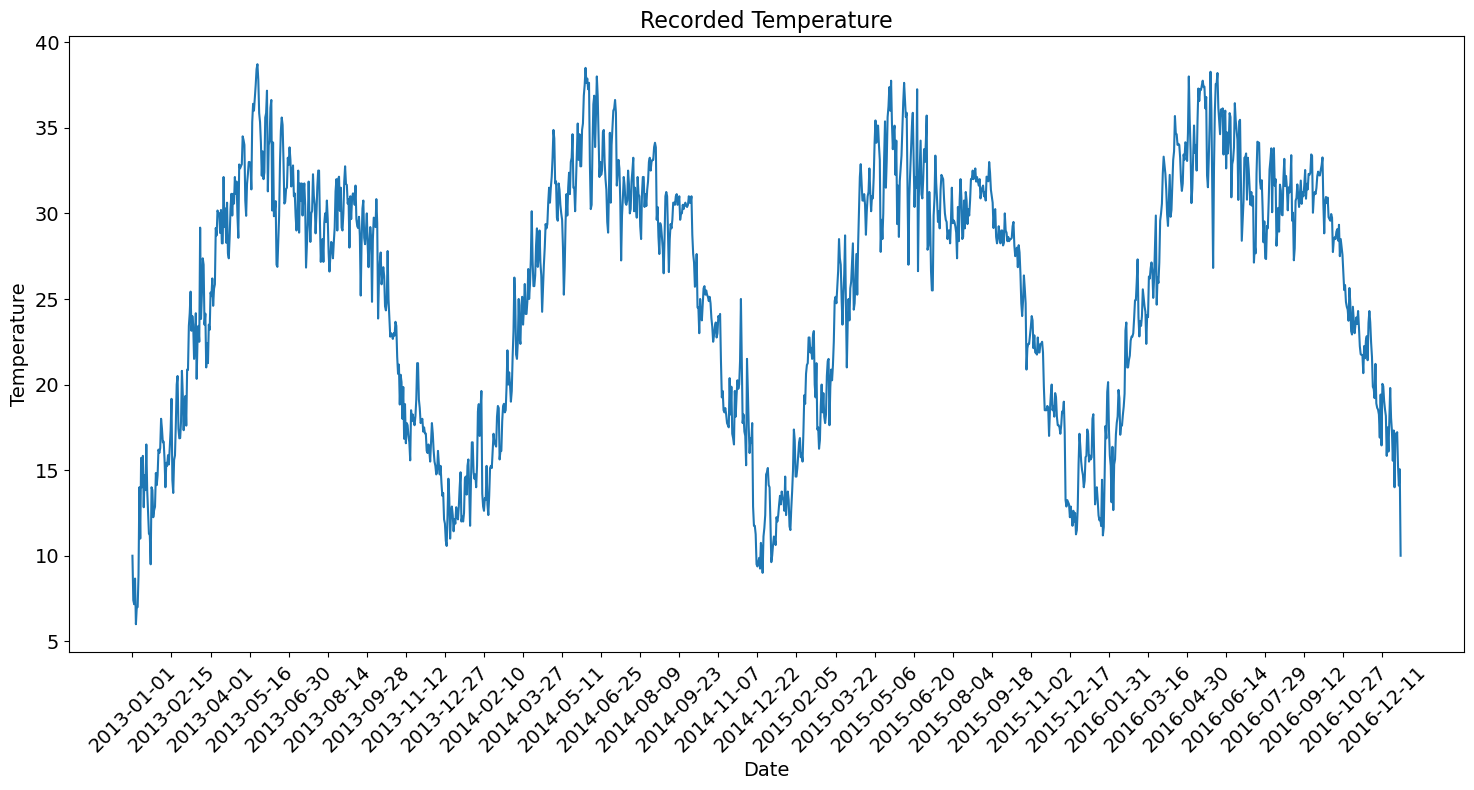

In [5]:
plt.figure(figsize=(18,8))
plt.plot(df.date, df['meantemp'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Recorded Temperature', fontsize=16)
plt.show()

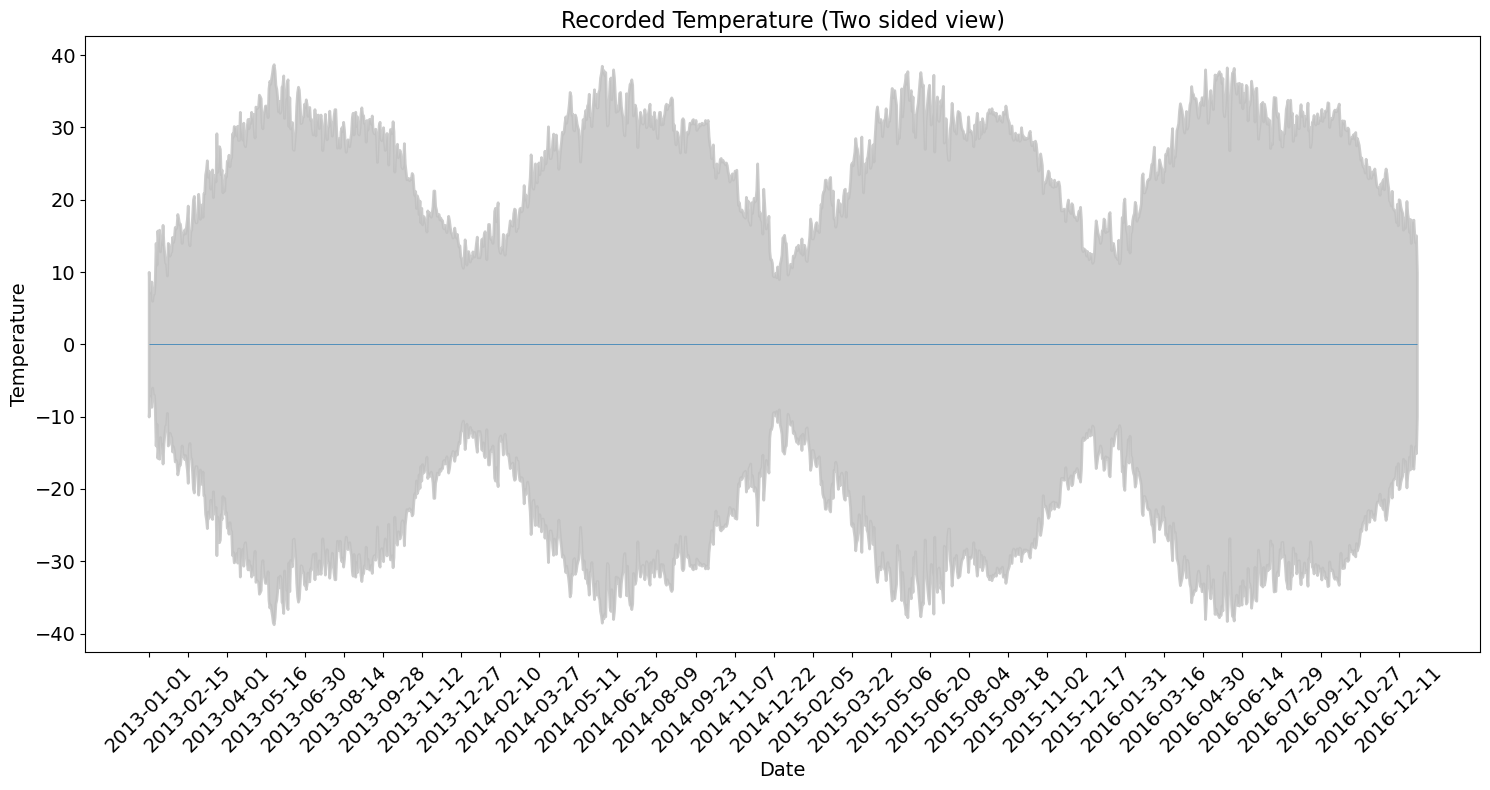

In [6]:
plt.figure(figsize=(18, 8))
plt.fill_between(df.date, y1=df['meantemp'], y2=-df['meantemp'], alpha=0.8, linewidth=2, color='silver')
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Recorded Temperature (Two sided view)", fontsize=16)
plt.show()


Temperature Years on Record:  2013 2014 2015 2016


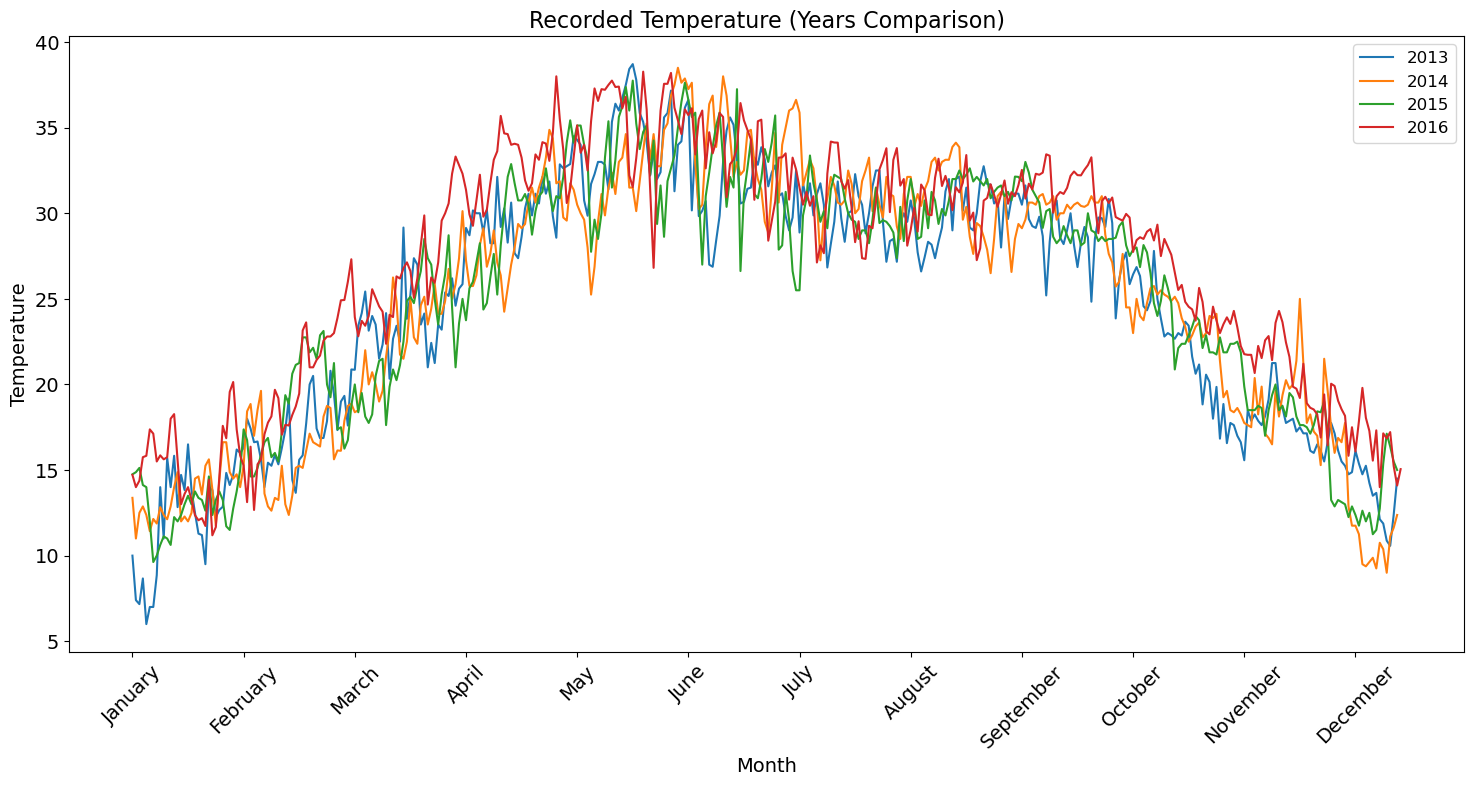

In [7]:
plt.figure(figsize=(18, 8))
dates = pd.to_datetime(df.date.iloc[:-1])
print("Temperature Years on Record: ", *dates.dt.year.unique())
for i in dates.dt.year.unique():
    plt.plot(df['meantemp'].iloc[:-1][dates.dt.year==i].values, label=i)
    
plt.xlabel("Month", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, 365, 32), labels=dates.dt.month_name().unique(), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Recorded Temperature (Years Comparison)", fontsize=16)
plt.legend(fontsize=12)
plt.show()

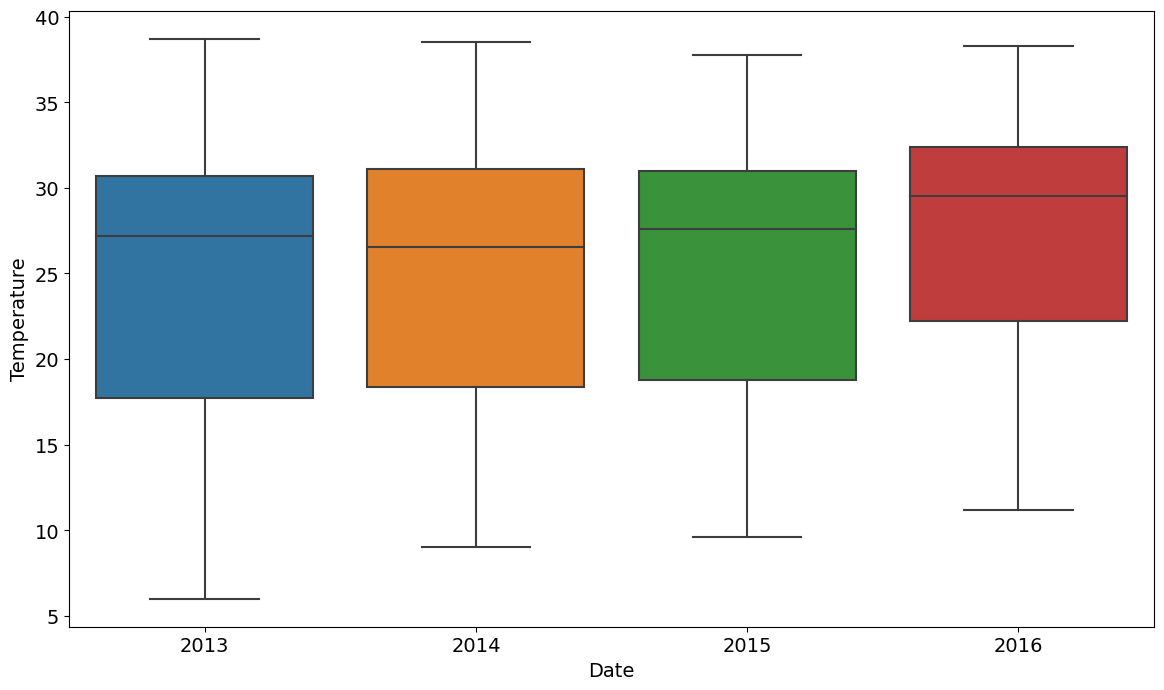

In [8]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=dates.dt.year.iloc[:-1], y='meantemp', data=df.iloc[:-1])
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

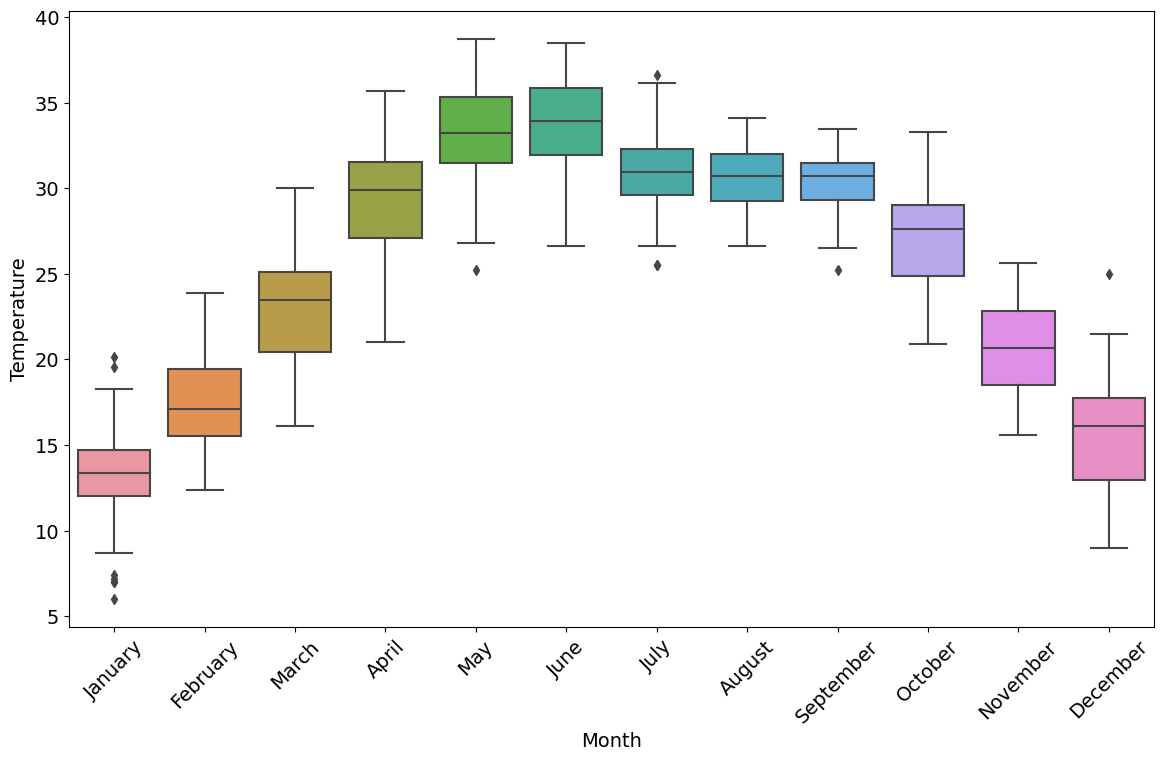

In [9]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=dates.dt.month.iloc[:-1], y='meantemp', data=df.iloc[:-1])
plt.xlabel("Month", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, 12), labels=dates.dt.month_name().unique(), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

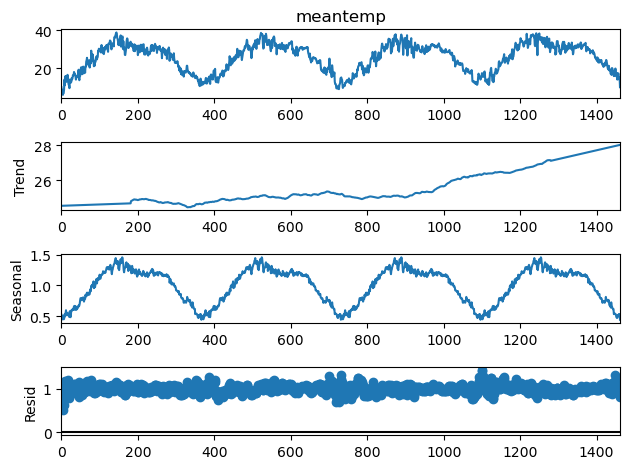

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 
decomp_mul = seasonal_decompose(df['meantemp'], model='multiplicative', extrapolate_trend='freq', period=365)
decomp_mul.plot()
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller, kpss

# Augmented Dickey Fuller (ADF) Test
result = adfuller(df['meantemp'].values, autolag='AIC')
print('ADF Statistic:', result[0], 'p-value:', result[1])

# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
result = kpss(df['meantemp'].values, nlags="auto", regression='c')
print('KPSS Statistic: ', result[0], 'p-value: ', result[1])

ADF Statistic: -2.021069055920673 p-value: 0.2774121372301602
KPSS Statistic:  0.18786352260533618 p-value:  0.1


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


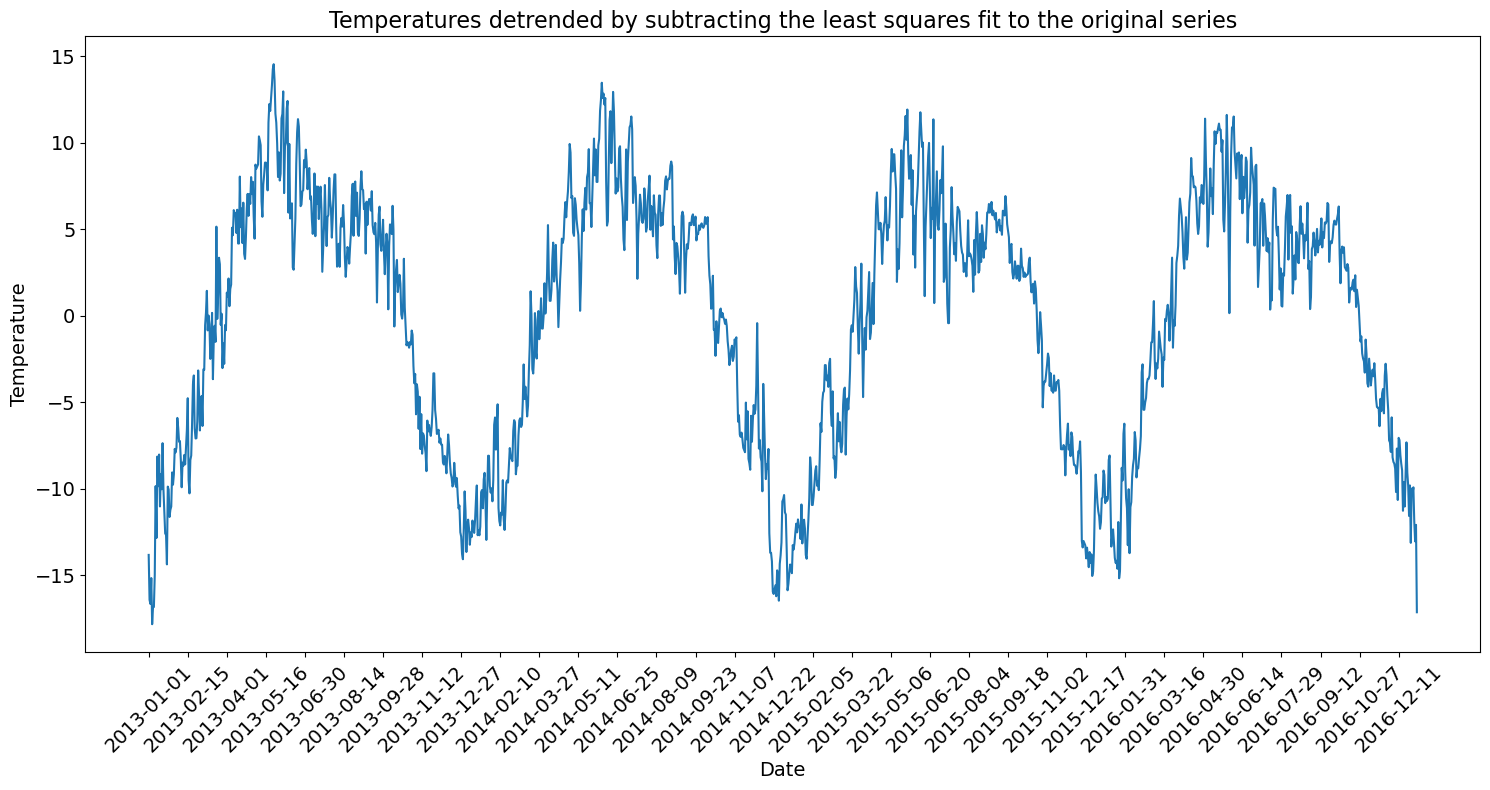

In [12]:
from scipy import signal

plt.figure(figsize=(18, 8))
detrended = signal.detrend(df['meantemp'].values)
plt.plot(df.date, detrended)
plt.title('Temperatures detrended by subtracting the least squares fit to the original series', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

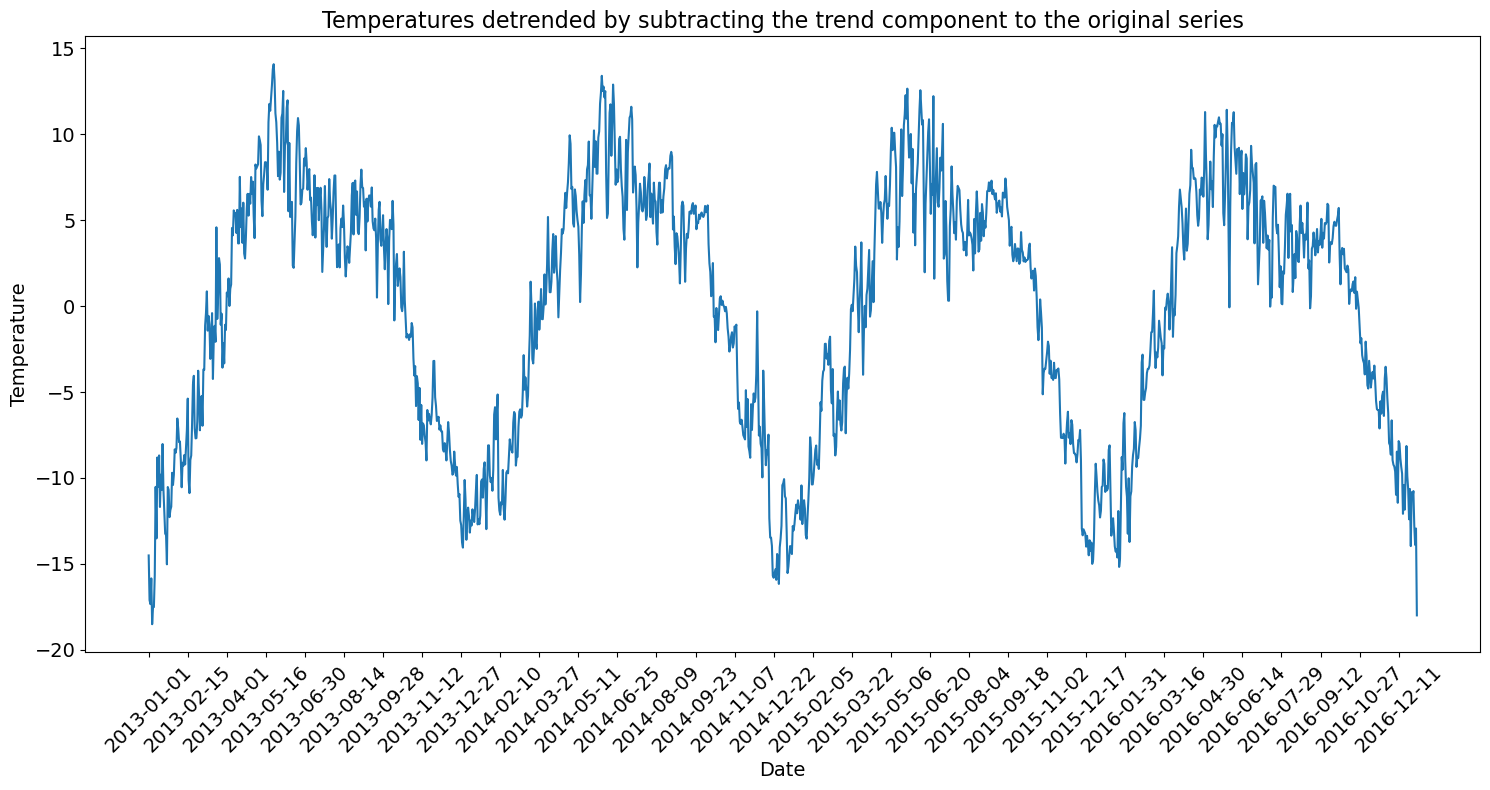

In [13]:
plt.figure(figsize=(18, 8))
decomp_mul = seasonal_decompose(df['meantemp'], model='multiplicative', extrapolate_trend='freq', period=365)
detrended = df['meantemp'].values - decomp_mul.trend
plt.plot(df.date, detrended)
plt.title('Temperatures detrended by subtracting the trend component to the original series', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

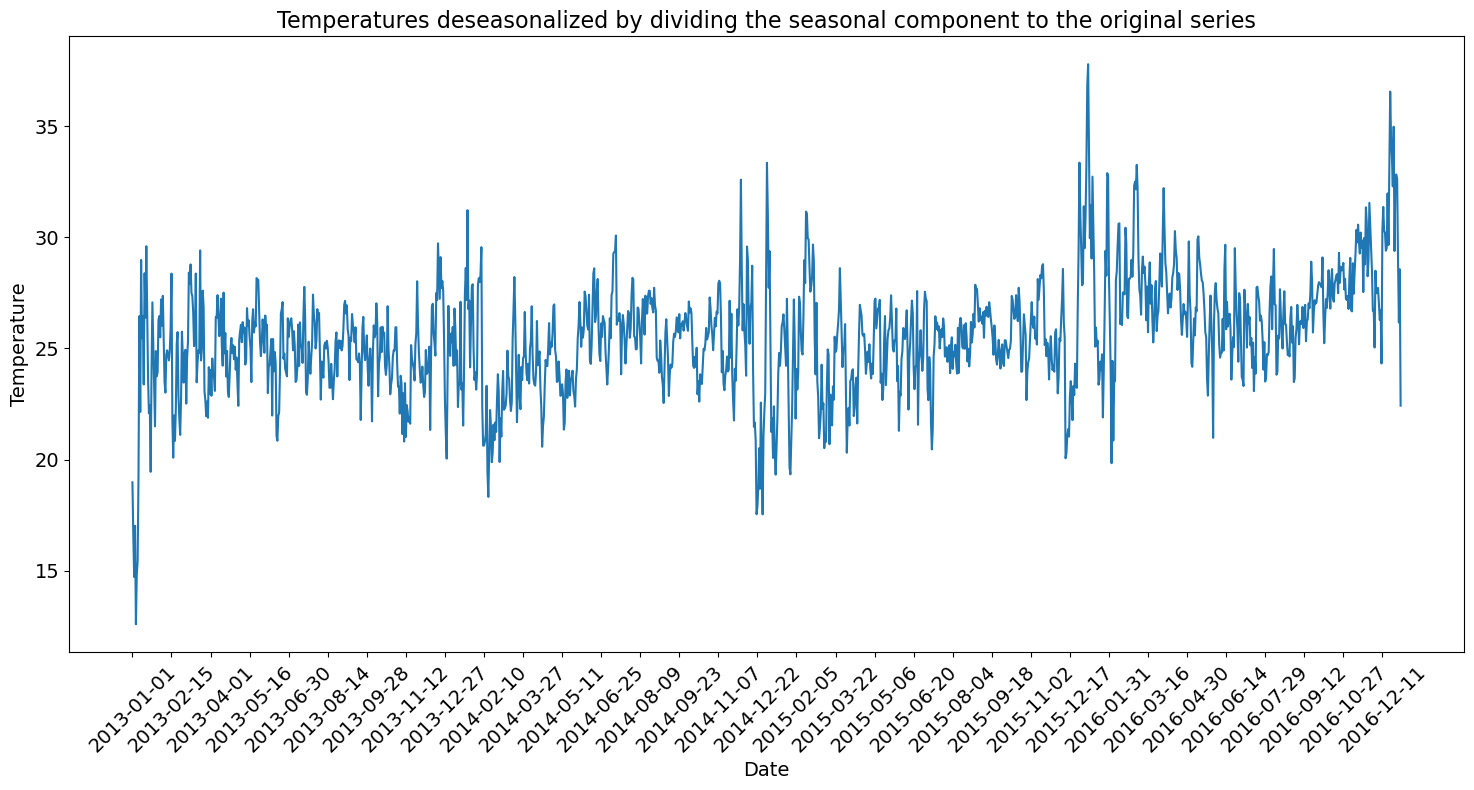

In [14]:
plt.figure(figsize=(18, 8))
deseasonalized = df['meantemp'].values / decomp_mul.seasonal
plt.plot(df.date, deseasonalized)
plt.title('Temperatures deseasonalized by dividing the seasonal component to the original series', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

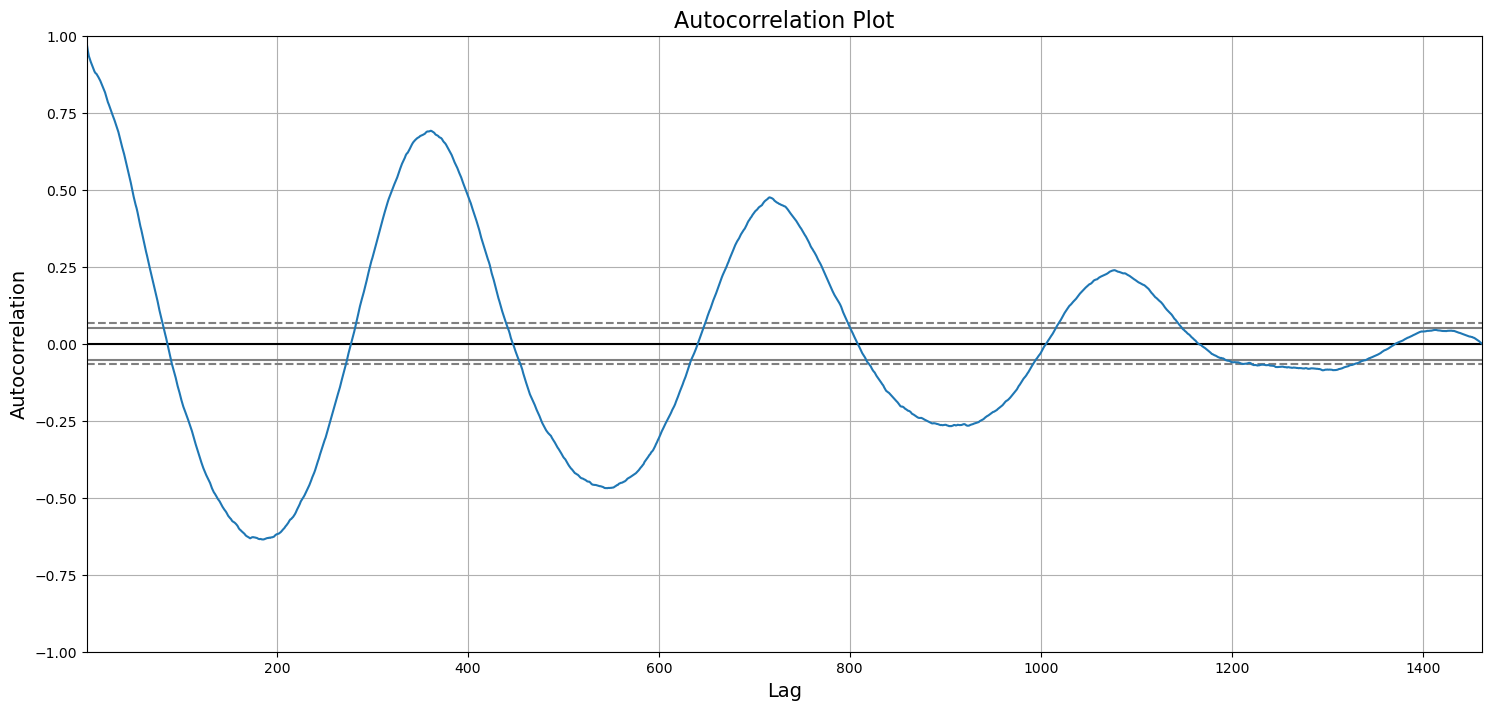

In [15]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(18, 8))
autocorrelation_plot(df['meantemp'])
plt.title('Autocorrelation Plot', fontsize=16)
plt.xlabel("Lag", fontsize=14)
plt.ylabel("Autocorrelation", fontsize=14)
plt.show()

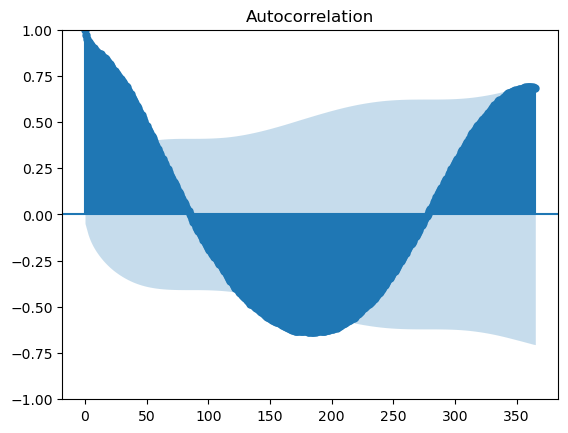

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


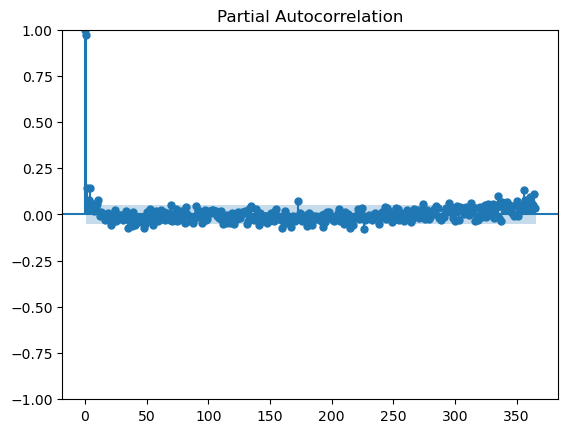

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['meantemp'], lags=365)
plt.show()
plot_pacf(df['meantemp'], lags=365)
plt.show()

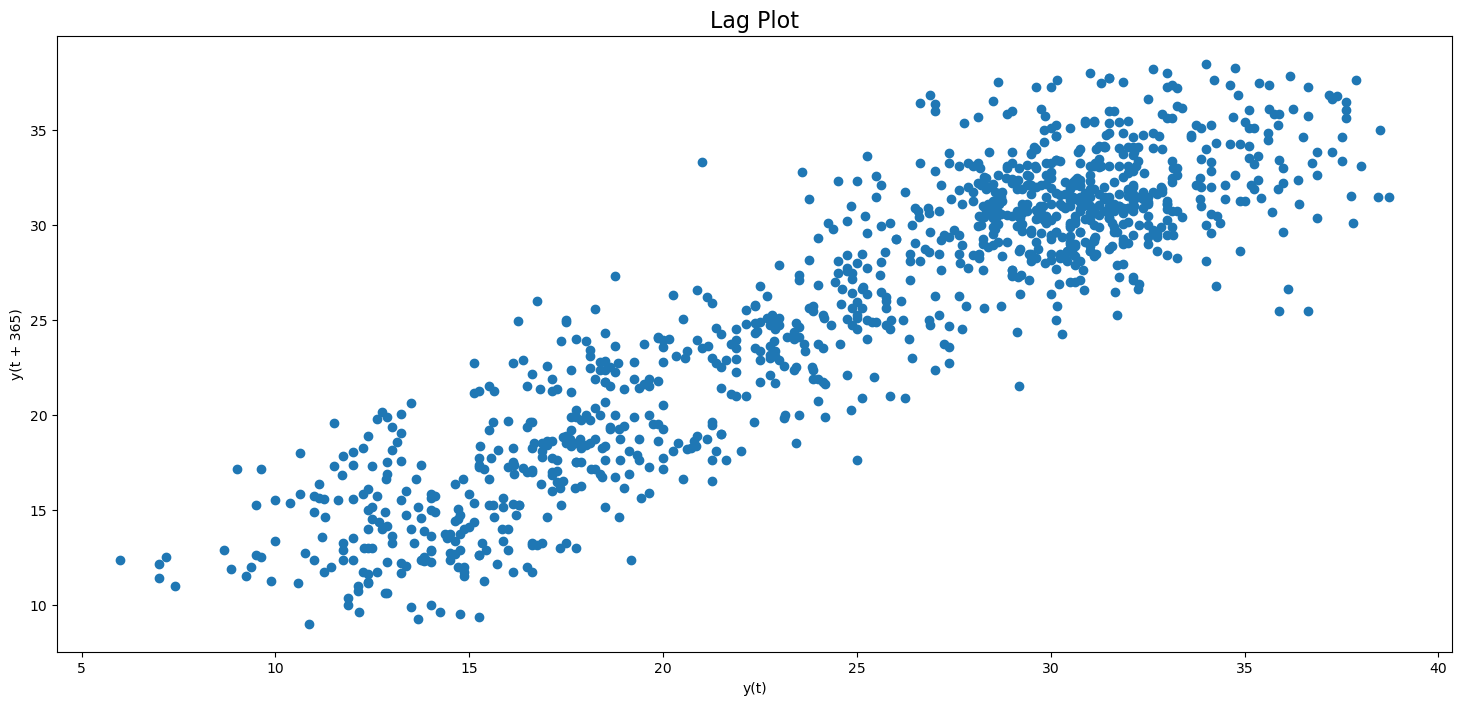

In [17]:
from pandas.plotting import lag_plot

plt.figure(figsize=(18, 8))
lag_plot(df['meantemp'], lag=365)
plt.title('Lag Plot', fontsize=16)
plt.show()

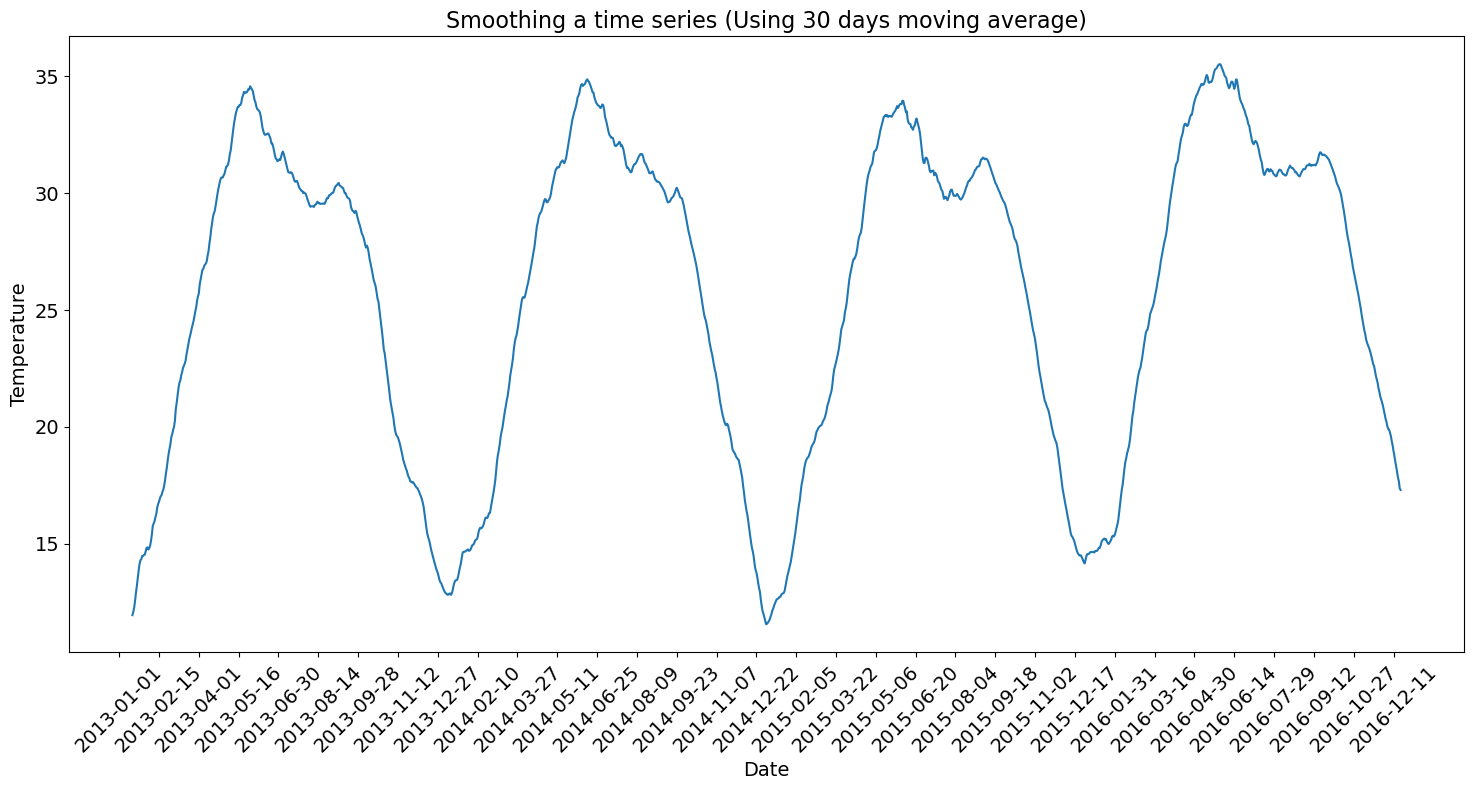

In [18]:
plt.figure(figsize=(18, 8))
df_ma = df['meantemp'].rolling(30, center=True, closed='both').mean()
plt.plot(df.date, df_ma)
plt.title('Smoothing a time series (Using 30 days moving average)', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [19]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# LOWESS smoothing (Locally Weighted Regression)
df_loess = pd.DataFrame(lowess(df['meantemp'], np.arange(len(df['meantemp'])), frac=0.10)[:, 1], index=df.date, columns=['meantemp'])
df_loess.head()

,meantemp
date,
2013-01-01,9.021920
2013-01-02,9.206480
2013-01-03,9.391054
2013-01-04,9.575645
2013-01-05,9.760254


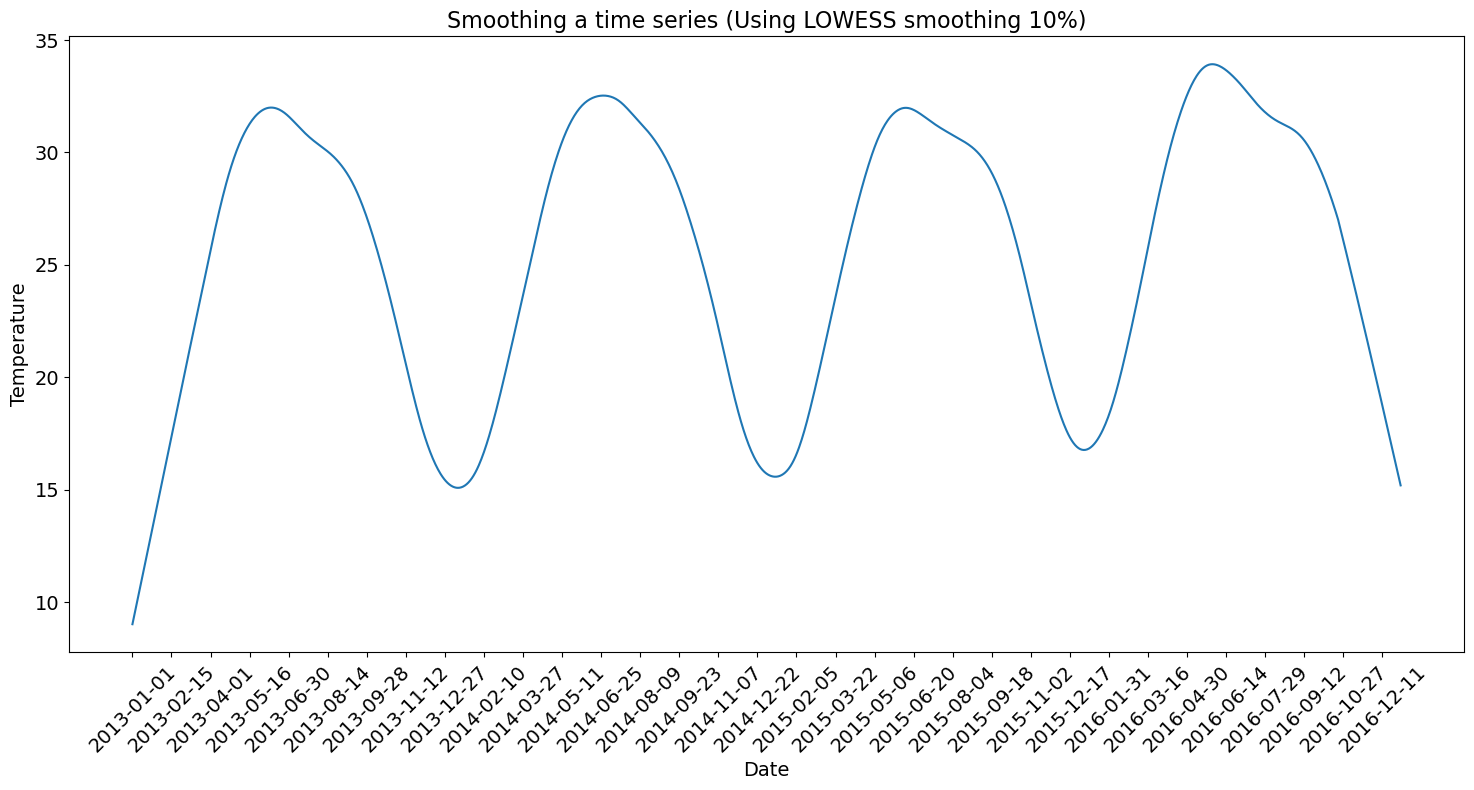

In [20]:
plt.figure(figsize=(18, 8))
plt.plot(df_loess.index, df_loess['meantemp'])
plt.title('Smoothing a time series (Using LOWESS smoothing 10%)', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [21]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(df[['meantemp', 'humidity']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.3483  , p=0.0039  , df_denom=1458, df_num=1
ssr based chi2 test:   chi2=8.3655  , p=0.0038  , df=1
likelihood ratio test: chi2=8.3416  , p=0.0039  , df=1
parameter F test:         F=8.3483  , p=0.0039  , df_denom=1458, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7585  , p=0.0637  , df_denom=1455, df_num=2
ssr based chi2 test:   chi2=5.5360  , p=0.0628  , df=2
likelihood ratio test: chi2=5.5255  , p=0.0631  , df=2
parameter F test:         F=2.7585  , p=0.0637  , df_denom=1455, df_num=2


{1: ({'ssr_ftest': (8.348287242759334, 0.003917586510546236, 1458.0, 1),
   'ssr_chi2test': (8.365464788526328, 0.0038241879867707707, 1),
   'lrtest': (8.341606126880833, 0.003874732859744176, 1),
   'params_ftest': (8.348287242759076, 0.003917586510546435, 1458.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.7585146949624835, 0.06371737139415601, 1455.0, 2),
   'ssr_chi2test': (5.535988253807871, 0.06278782291707086, 2),
   'lrtest': (5.5255191051082875, 0.06311735216461932, 2),
   'params_ftest': (2.7585146949627695, 0.06371737139413886, 1455.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [22]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['meantemp'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2768.239
Date:                Sat, 27 May 2023   AIC                           5542.478
Time:                        11:56:53   BIC                           5558.339
Sample:                             0   HQIC                          5548.395
                               - 1462                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5728      0.046     12.494      0.000       0.483       0.663
ma.L1         -0.8028      0.036    -22.070      0.000      -0.874      -0.731
sigma2         2.5896      0.072     36.204      0.0

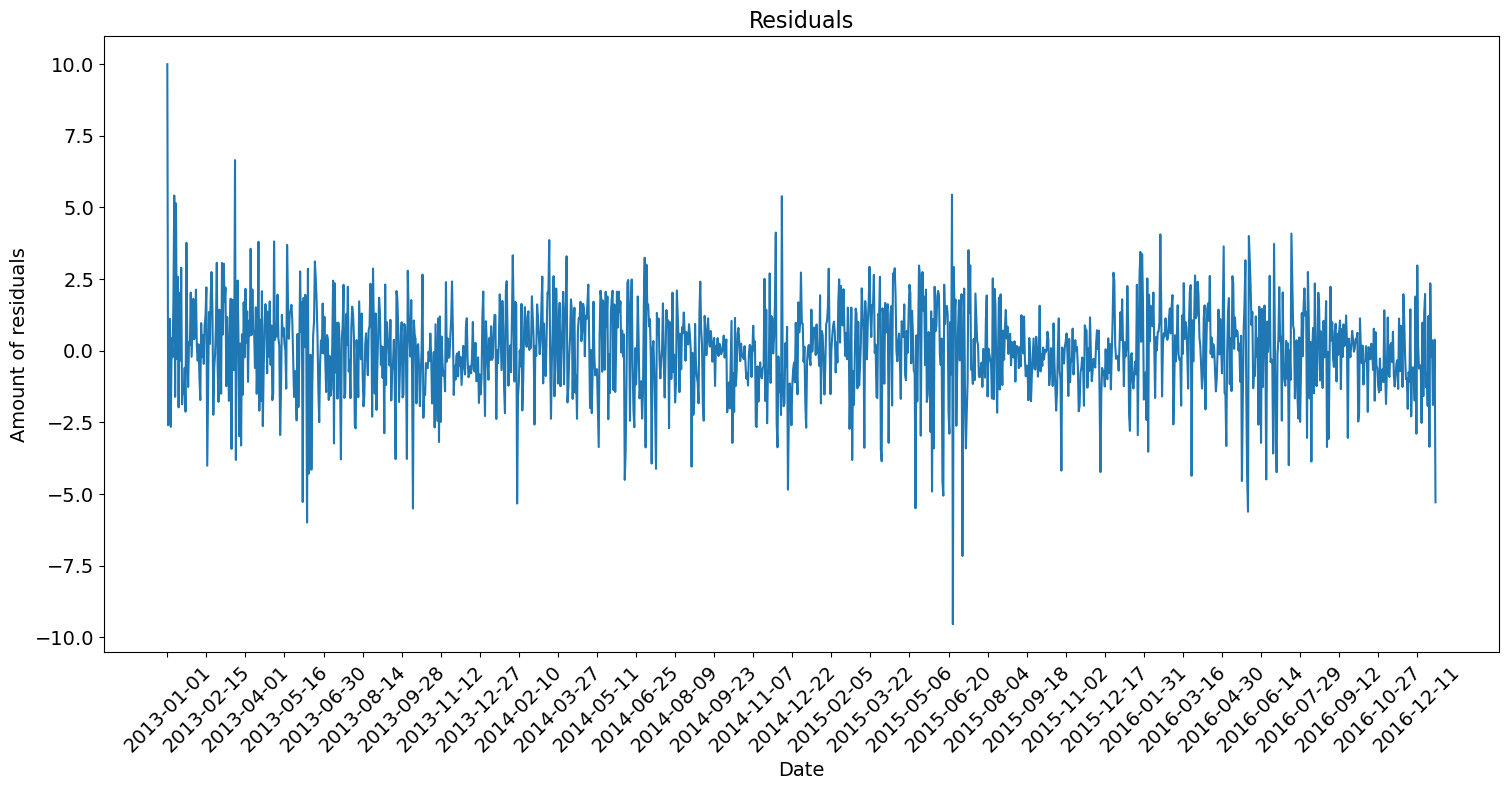

In [23]:
# Plotting residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(18, 8))
plt.plot(residuals)
plt.title('Residuals', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Amount of residuals", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), labels=[df.date[i] for i in range(0, len(df.date)+1, 45)], rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<Figure size 1800x800 with 0 Axes>

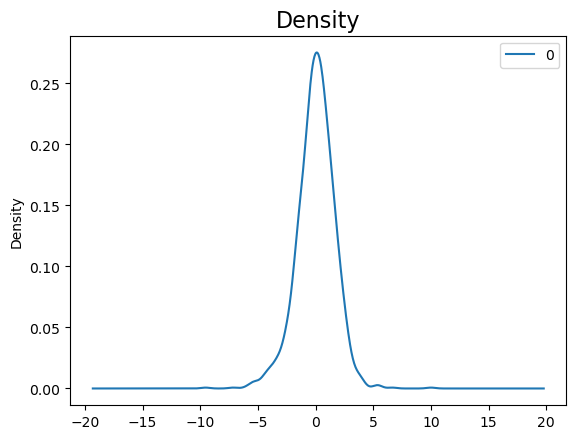

In [24]:
plt.figure(figsize=(18, 8))
residuals.plot(kind='kde', title='Density')
plt.title('Density', fontsize=16)
plt.show()

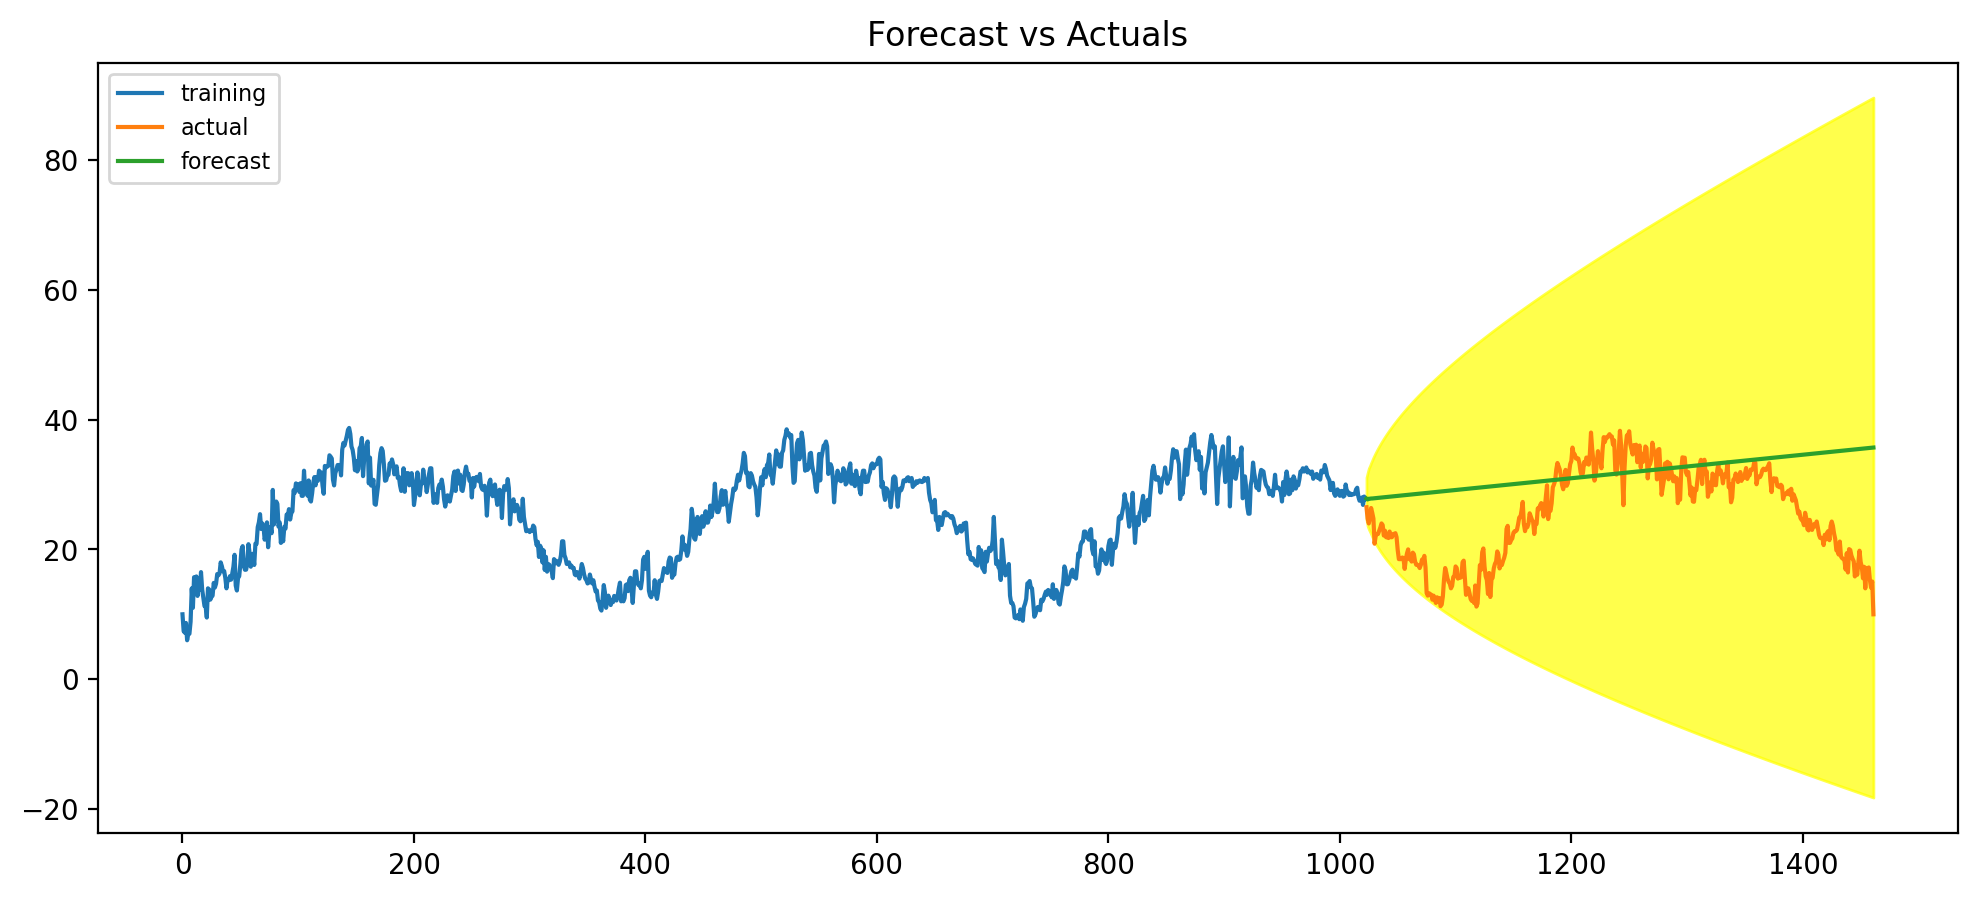

In [25]:
train = df['meantemp'][:int(np.floor((len(df)/100)*70))]
test = df['meantemp'][int(np.floor((len(df)/100)*70)):]

model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()  

fc = fitted.get_forecast(len(df['meantemp'][int(np.floor((len(df)/100)*70)):]))  
conf = fc.conf_int(alpha=0.05) # 95% confidence

fc_series = pd.Series(fc.predicted_mean, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=200)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='yellow', alpha=0.7)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()